In [8]:
%load_ext autoreload
%autoreload 2

In [167]:
from rlmep.envs import get_diffusion_env
from rlmep.agents import RandomAgent, QLearningAgent
import matplotlib.pyplot as plt
import numpy as np

In [168]:
env = get_diffusion_env(grid_spacing=0.25, grid_size=(30, 30))
agent = RandomAgent.from_env(env)

obs, _ = env.reset()
state_history = [obs]
for _ in range(500):
    action = agent.get_action(obs)
    obs, reward, done, truncated, info = env.step(action)
    state_history.append(obs.copy())

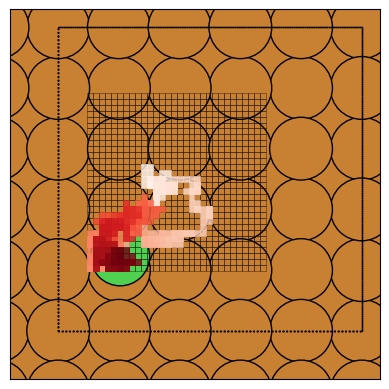

In [169]:
fig, ax = plt.subplots()
env.visualize(ax, state_history=state_history)

In [217]:
state_shape = (20, 20)

env = get_diffusion_env(grid_spacing=0.25, 
                        grid_size=state_shape, 
                        barrier_max=5.0, 
                        max_steps=50,
                        adsorbate_atom='O')

agent = QLearningAgent(
    state_shape=state_shape,
    action_shape=4,
    discount_factor=0.90,
    epsilon=0.25,
    learning_rate=1.0,
    Q_init=0,
)

for rollout in range(100):
    state, _ = env.reset()
    state_history = [state]
    for _ in range(1000):
        action = agent.get_action(state)
        next_state, reward, done, truncated, info = env.step(action)
        agent.update(state, action, reward, next_state, terminal=done or truncated)
        state = next_state.copy()
        state_history.append(state.copy())

        if done or truncated:
            print(f"Episode finished after {len(state_history)} timesteps - {reward}")
            break

Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 30 timesteps - 0.9682293086482957
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 22 timesteps - 0.9221522939764
Episode finished after 20 timesteps - 0.9682293086482957
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 51 timesteps - -1
Episode finished after 14 timesteps - 0.9785239214913

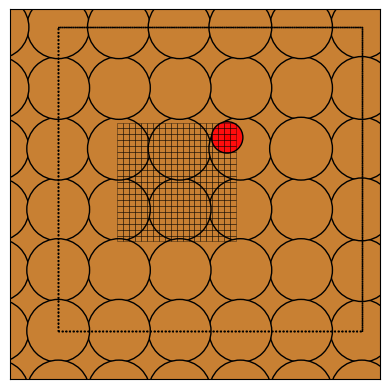

In [218]:
fig, ax = plt.subplots()
env.visualize(ax)

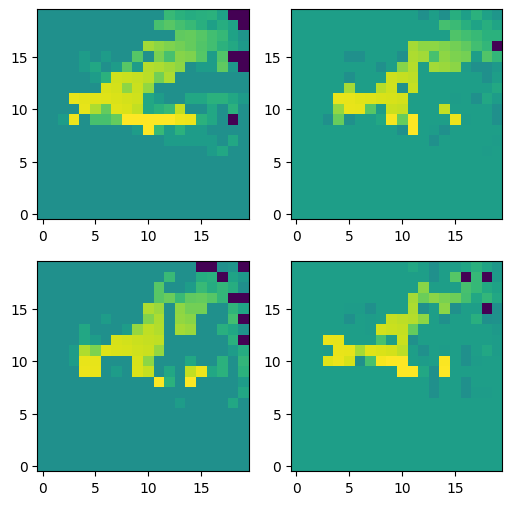

In [219]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

x, y = env.gridspec.get_grid()
X, Y = np.meshgrid(x, y)

action_names = {0: "right", 1: "left", 2: "up", 3: "down"}
env.reset()

for i, ax in enumerate(axes.flat):
    ax.imshow(agent.q_table[:, :, i].T, origin="lower", aspect="auto")